In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Homework 1

## References

+ Module 1: Introduction
+ Module 2: Modern Machine Learning Software

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name: Shaunak**
+ **Last Name:Mukherjee**
+ **Email:mukher86@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): No**
+ **Which generative AI tool did you use (if applicable)?:  NA**

## Problem 1 - Recursion vs Iteration

This problem adjusted from the [Structure and Interpretation of Computer Programs](https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book.html) book.
In particular from [this section](https://mitp-content-server.mit.edu/books/content/sectbyfn/books_pres_0/6515/sicp.zip/full-text/book/book-Z-H-11.html#%_sec_1.2.1).

Imagine you are working with a programming language that does not have loops.
This is how you have to think when writing code in `Jax`.
Let's say we want to write a function that calculates the factorial of a number:

$$
n! = n \times (n-1) \times (n-2) \times \dots \times 1
$$

The standard recursive definition of the factorial function is:

In [2]:

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

Here is how it can be used:

In [3]:
factorial(5)

120

Let's unroll what actually happens behind the scenes:

```python
factorial(5)
5 * factorial(4)
5 * (4 * factorial(3))
5 * (4 * (3 * factorial(2)))
5 * (4 * (3 * (2 * factorial(1))))
5 * (4 * (3 * (2 * 1)))
5 * (4 * (3 * 2))
5 * (4 * 6)
5 * 24
120
```

You quickly notice, that the amount of intermediate results that are stored in memory grows exponentially with the input.
This won't work for large inputs, because you will run out of memory.
But, there is another way to achieve the same result without exploding memory usage.
We could start by multiplying 1 by 2, then the result with 3, then the result with 4, and so on.
So, we keep track of a running product that we update.
We don't need a loop to do this kind of iteration.
We can do it with recursion:

In [4]:
def fact_iter(product, counter, max_iter):
    if counter > max_iter:
        return product
    else:
        return fact_iter(counter * product, counter + 1, max_iter)

def good_factorial(n):
    return fact_iter(1, 1, n)

Check that this works as before:

In [5]:
good_factorial(5)

120

Here is how this unrolls:

```python
factorial(5)
fact_iter(1, 1, 5)
fact_iter(1, 2, 5)
fact_iter(2, 3, 5)
fact_iter(6, 4, 5)
fact_iter(24, 5, 5)
fact_iter(120, 6, 5)
120
```

We say that the second approach is *iterative* and the first approach is *recursive*.
We want to be writing iterative code, because it is more efficient.

Write iterative code that, given $n$, computes the fibonacci number:

$$
f_n = f_{n-1} + f_{n-2}
$$

where $f_0 = 0$ and $f_1 = 1$.
You should not use a loop!

**Answer:**

In [6]:
# Your code here - Demonstrate that it works

# Define main function (no loop or recusion)
def fibonacci_iterative(n):

  if n < 0:

      print("n must be a non-negative integer.")

  if n == 0:
      return 0
  if n == 1:
      return 1

  def fibo_step(a, b, counter, max_iter):
      if counter == max_iter:
          return b
      return fibo_step(b, a + b, counter + 1, max_iter)

  # Initial state need to be defined: (f0 = 0, f1 = 1, current step = 1, max_iter = n)
  return fibo_step(0, 1, 1, n)

 *Here show how your code works for $n=5$ like I did above with the factorial example.*

In [7]:
# Demonstration
fibonacci_iterative(5)

5

This is how it should compute

```
fibonacci_iterative(5)
fibo_step(0, 1, 1, 5)
fibo_step(1, 1, 2, 5)
fibo_step(1, 2, 3, 5)
fibo_step(2, 3, 4, 5)
fibo_step(3, 5, 5, 5)
5
```


## Problem 2 - The `foldl` function

The `foldl` function is a higher order function that is used to implement iteration.
It is defined as follows:

$$
\text{foldl}(f, z, [x_1, x_2, \dots, x_n]) = f(f(\dots f(f(z, x_1), x_2), \dots), x_n)
$$

where $f$ is a function that takes two arguments and $z$ is the initial value.
In words, `foldl` takes a function $f$, an initial value $z$, and a list $[x_1, x_2, \dots, x_n]$.
It then applies $f$ to $z$ and the first element of the list, then applies $f$ to the result of the previous application and the second element of the list, and so on.

Implement `foldl` in `Python`. Pay attention to create an iterative implementation.

**Answer:**

In [8]:
# Your code here - Demonstrate that it works

# Iterative
def foldl(f, z, lst):
  iterator = iter(lst)
  result = z

  while True:
      try:
          result = f(result, next(iterator))
      except StopIteration:
          return result

Use your `foldl` function to implement the `sum` function and the `product` function.

**Answer:**

In [9]:
# Defining sum and product functions using foldl function

def sum_list(lst):
    return foldl(lambda x, y: x + y, 0, lst) #The initial value is 0

def product_list(lst):
  return foldl(lambda x, y: x * y, 1, lst) # The initial value is 1


In [10]:
# Your code here - Demonstrate that it works
lst = [3, 1, 2, 5, 4]

print(f" Sum:{sum_list(lst)}")

print(f" Product:{product_list(lst)}")

 Sum:15
 Product:120


## Problem 3 - No Loops in Jax

Use `Jax`'s [`jax.lax.scan`](https://jax.readthedocs.io/en/latest/_autosummary/jax.lax.scan.html) to implement and `jit` a function that returns the Fibonacci sequence up to a given number.
Don't bother using integer types, just use `float32` for everything.

**Answer:**

In [11]:
import jax
import jax.numpy as jnp
from jax import lax
import functools as ft

# Function definition with jit, making n static
@ft.partial(jax.jit, static_argnums=(0,))
def fibonacci_sequence(n):
  def f(carry, _):
      a, b = carry
      return (b, a + b), b

  # Used jax.lax.scan here calculate the Fibonacci sequence
  _, fibo_sequence = lax.scan(f, (jnp.float32(0), jnp.float32(1)), None, length= n-1)
  return jnp.concatenate([jnp.array([0.], dtype=jnp.float32), fibo_sequence])


n = 10  # Length of the Fibonacci sequence
result = fibonacci_sequence(n)
print(f" For n = {n} Fibonacci sequence is: {jnp.int32(jnp.round(result))}")


 For n = 10 Fibonacci sequence is: [ 0  1  1  2  3  5  8 13 21 34]


In [12]:
# More demonstration below
n = 10

for i in range(1, n+1):
  result = fibonacci_sequence(i)
  int_result = jnp.int32(jnp.round(result))
  print(f"For n = {i}, Fibonacci sequence is: {int_result}")

For n = 1, Fibonacci sequence is: [0]
For n = 2, Fibonacci sequence is: [0 1]
For n = 3, Fibonacci sequence is: [0 1 1]
For n = 4, Fibonacci sequence is: [0 1 1 2]
For n = 5, Fibonacci sequence is: [0 1 1 2 3]
For n = 6, Fibonacci sequence is: [0 1 1 2 3 5]
For n = 7, Fibonacci sequence is: [0 1 1 2 3 5 8]
For n = 8, Fibonacci sequence is: [ 0  1  1  2  3  5  8 13]
For n = 9, Fibonacci sequence is: [ 0  1  1  2  3  5  8 13 21]
For n = 10, Fibonacci sequence is: [ 0  1  1  2  3  5  8 13 21 34]


## Problem 4 - Feigenbaum Map

Consider the function:

$$
f(x; r) = r x (1 - x)
$$

where $r$ is a parameter.
One can define dynamics on the real line by iterating this function:

$$
x_{n+1} = f(x_n; r)
$$

where $x_n$ is the state at time $n$.

This map exhibits a [period doubling cascade](https://en.wikipedia.org/wiki/Feigenbaum_constants) as $r$ increases.

Write a function in `jax`, call it `logistic_map`, that takes a lot of $r$'s and $x_0$'s as inputs and returns the first $n$ states of the system.
You should independently vectorize for the $r$'s and the $x_0$'s.
And you should `jit`.
Use `jax.lax.scan` to implement the iteration.

**Answer:**

I found a better article https://arpita95b.medium.com/feigenbaum-constant-60fe5e5b4c72

In [13]:
# Your code here - Demonstrate that it works

import jax
import jax.numpy as jnp
from jax import lax, vmap
import functools as ft

@ft.partial(jax.jit, static_argnums=(2,))
def logistic_map(rs, x0s, n):
  def f(x, r):
      result = r * x * (1 - x)
      # jax.debug.print("f(x, r) -> r: {r}, x: {x}, result: {result}", r=r, x=x, result=result)
      return result


  def scan(carry, _):
      x, r = carry
      next_x = f(x, r)
      # jax.debug.print("step -> x: {x}, r: {r}, next_x: {next_x}", x=x, r=r, next_x=next_x)
      return (next_x, r), next_x


  @vmap
  def outer_vmap(r):
    @vmap
    def inner_vmap(x0):
        _, track = jax.lax.scan(scan, (x0, r), None, length=n)
        # jax.debug.print("inner_vmap -> r: {r}, x0: {x0}, track: {track}", r=r, x0=x0, track=track[:5])

        return track

    return inner_vmap(x0s)
    print(inner_vmap(x0s))

  return outer_vmap(rs)
  print(outer_vmap(rs))

Test your code here:

In [14]:
x0s = jnp.linspace(0, 1, 100)
rs = jnp.linspace(0, 4, 1_000)
n = 10_000
data = logistic_map(rs, x0s, n)

Your shape should  be `(1000, 100, 10000)`:

In [15]:
data.shape

(1000, 100, 10000)

Discard all but the last iteration:

In [16]:
data = data[:, :, -1:]
data.shape

(1000, 100, 1)

Make the famous period doubling plot. The plot will take a while and it will take a lot of memory. I suggest you restart your kernel before moving to the next problem.

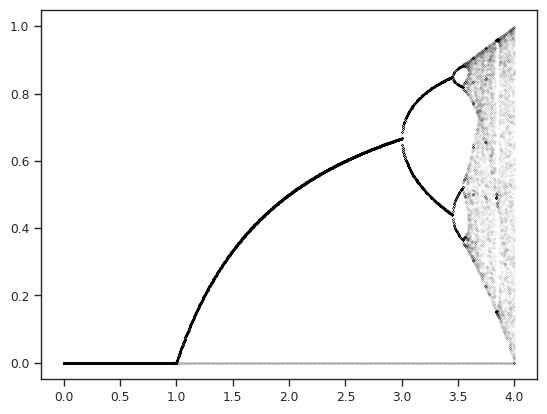

In [17]:
fig, ax = plt.subplots()
ax.plot(rs,
        data.reshape(data.shape[0], data.shape[1] * data.shape[2]),
        '.k',
        ms=0.1,
        alpha=0.5
);

## Problem 5 - Implement autoencoders in `jax`, `equinox`, and `optax`

Implement [autoencoders](https://en.wikipedia.org/wiki/Autoencoder) in `jax` and train it on the MNIST dataset.
Autoencoders, consist of two neural networks, an encoder and a decoder. The encoder maps the input to a latent space (typically of a much smaller dimension than the input), and the decoder maps the latent space back to the input space.
You can think of the encoder as a compression algorithm and the decoder as a decompression algorithm.
Alternatively, you can think of the encoder as the projection of the input data onto a lower-dimensional manifold, and the decoder as the reconstruction operator.

### Part A
Follow these directions:
+ Pick the dimension of the latent space to be 2. This means that the encoder will map the input to a 2-dimensional space, and the decoder will map the 2-dimensional space back to the input space.
+ Your encoder should work on a flattened version of the input image. This means that the input to the encoder is a vector of 784 elements (28x28).
+ Start by picking your encoder $z = f(x;\theta_f)$ to be a neural network with 2 hidden layers, each with 128 units and ReLU activations. Increase the number of units and layers if you think it is necessary.
+ Start by picking your decoder $x' = g(z;\theta_g)$ to be a neural network with 2 hidden layers, each with 128 units and ReLU activations. Increase the number of units and layers if you think it is necessary.
+ Make all your neural networks in `equinox`.
+ The loss function is the mean squared error between the input and the output of the decoder:

$$
\mathcal{L} = \frac{1}{N}\sum_{i=1}^N ||x_i - g(f(x_i;\theta_f);\theta_g)||^2.
$$

where $N$ is the number of samples in the dataset.
+ Split the MNIST dataset into a training and a test set.
+ Use `optax` for the optimization.
+ Train the autoencoder using the Adam optimizer with a learning rate of 0.001 for 1 epoch to debug. Use a batch size of 32. Feel free to play with the learning rate and batch size.
+ Monitor the loss function on the training and test set. Increase the number of epochs up to the point where the loss function on the test set stops decreasing.

Here is the dataset:

In [18]:
# Download the MNIST dataset
from sklearn.datasets import fetch_openml
import torch

mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)


**Answer:**

*Put your answer here. Use as many markdown and code blocks as you want.*

In [86]:
# Import libraries
import jax
import jax.numpy as jnp
from jax import lax, vmap
import equinox as eqx
import optax
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import jax.random as jrandom
from sklearn.mixture import GaussianMixture

Defined hyperparameters

In [ ]:
# Define Hyperparameters
LEARNING_RATE = 1e-3
NUM_EPOCHS = 1000 # epoch to debug
SEED = 42
BATCH_SIZE = 64
key = jrandom.PRNGKey(SEED)

Convert to Dataloader, transform and normalize (sources https://docs.kidger.site/equinox/examples/mnist/ and https://predictivesciencelab.github.io/advanced-scientific-machine-learning/ml-software/optimization/09_gpu_training.html )

In [20]:
# Convert data to torch tensors and normalize
X_train = torch.tensor(X_train.values, dtype=torch.float32) / 255.0
X_val = torch.tensor(X_val.values, dtype=torch.float32) / 255.0
X_test = torch.tensor(X_test.values, dtype=torch.float32) / 255.0
y_train = torch.tensor(y_train.astype(int).values, dtype=torch.long)
y_val = torch.tensor(y_val.astype(int).values, dtype=torch.long)
y_test = torch.tensor(y_test.astype(int).values, dtype=torch.long)

# Create a custom Dataset class for MNIST
class MNISTDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx].view(28, 28)
        label = self.y[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define  transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

# Create DataLoader instances for training, validation, and testing
train_dataset = MNISTDataset(X_train, y_train, transform=transform)
val_dataset = MNISTDataset(X_val, y_val, transform=transform)
test_dataset = MNISTDataset(X_test, y_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


for data, labels in train_dataset:
    print(data.shape)  # Shape of the data in the first batch
    break

# Plot and vizualize dataset
def show_images(images, labels):
    ncols = len(labels)
    nrows = int(np.ceil(len(images) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    for ax in axes.ravel():
        ax.axis("off")
    for ax, image, label in zip(axes.ravel(), images, labels):
        ax.imshow(image.squeeze(), cmap="gray")
        ax.set_title(int(label))
    plt.tight_layout()

# Select 5 random images and vizualize
k = 5
images, labels = next(iter(train_loader))
images = images[:k]
labels = labels[:k]

# Visualize the images
show_images(images, labels)


Create Dataloader

In [22]:
# Create DataLoader instances for training, validation, and testing
train_dataset = MNISTDataset(X_train, y_train, transform=transform)
val_dataset = MNISTDataset(X_val, y_val, transform=transform)
test_dataset = MNISTDataset(X_test, y_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Vizualization of dataset for peace of mind!

torch.Size([1, 28, 28])


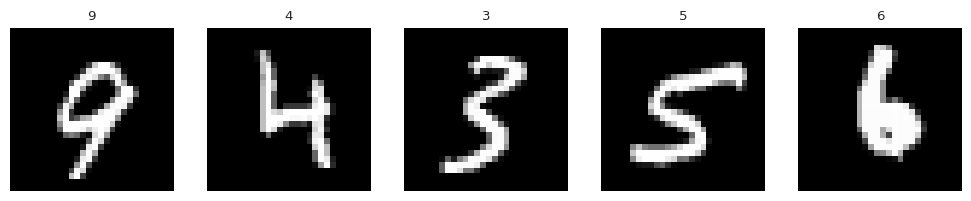

In [88]:
for data, labels in train_dataset:
    print(data.shape)  # Shape of the data in the first batch
    break

# Plot and vizualize dataset
def show_mnist_images(images, labels):
    ncols = len(labels)
    nrows = int(np.ceil(len(images) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    for ax in axes.ravel():
        ax.axis("off")
    for ax, image, label in zip(axes.ravel(), images, labels):
        ax.imshow(image.squeeze(), cmap="gray")
        ax.set_title(int(label))
    plt.tight_layout()

# Select 5 random images and vizualize
k = 5
images, labels = next(iter(train_loader))
images = images[:k]
labels = labels[:k]

# Visualize the images
show_mnist_images(images, labels)

In [24]:
# Define the encoder z=f(x;θf)  to be a neural network with 2 hidden layers, each with 128 units and ReLU activations.
class Encoder(eqx.Module):
    layers: list

    def __init__(self, key):
        key1, key2, key3 = jax.random.split(key, 3)
        self.layers = [
            eqx.nn.Linear(784, 128, key=key1),
            eqx.nn.Linear(128, 128, key=key2),
            eqx.nn.Linear(128, 2, key=key3),
        ]

    def __call__(self, x):
        x = self.layers[0](x)
        for layer in self.layers[1:]:
            x = jax.nn.relu(layer(x))
        return x

# Define the decoder x′=g(z;θg)  to be a neural network with 2 hidden layers, each with 128 units and ReLU activations.
class Decoder(eqx.Module):
    layers: list

    def __init__(self, key):
        key1, key2, key3 = jax.random.split(key, 3)
        self.layers = [
            eqx.nn.Linear(2, 128, key=key1),
            eqx.nn.Linear(128, 128, key=key2),
            eqx.nn.Linear(128, 784, key=key3),
        ]

    def __call__(self, z):
        for layer in self.layers[:-1]:
            z = jax.nn.relu(layer(z))
        return self.layers[-1](z)

## Main model function
class Autoencoder(eqx.Module):
    encoder: Encoder
    decoder: Decoder

    def __init__(self, x):
        key1, key2 = jax.random.split(key, 2)
        self.encoder = Encoder(key)
        self.decoder = Decoder(key)

    def __call__(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

# Initialize the model
model = Autoencoder(key)


Define MSE loss and Adam optimizer

In [25]:
# Loss function is the mean squared error between the input and the output of the decoder
@eqx.filter_jit
def mse_loss(model, x):
    z = vmap(model.encoder)(x)
    x_recon = vmap(model.decoder)(z)
    return jnp.mean(jnp.sum((x - x_recon) ** 2, axis=1))


# optimizer using optax done!
optim = optax.adamw(LEARNING_RATE)

Evaluate loss

In [26]:
# Define function to update the model losses
def evaluate(model,test_data):
    avg_loss = 0

    for x, y in test_loader:
        x = x.numpy()
        x = x.reshape(x.shape[0], -1)
        avg_loss += mse_loss(model, x)
    return avg_loss / len(test_data)

Define Training loop

In [27]:
# Define main training loop
def train(model, train_loader, test_loader, optim, num_epochs, batch_size):
    opt_state = optim.init(eqx.filter(model, eqx.is_array))

    # Lists to store the losses
    epoch_train_losses = []
    epoch_test_losses = []

    @eqx.filter_jit
    def make_step(model, opt_state, x):
        loss_value, grads = eqx.filter_value_and_grad(mse_loss)(model, x)
        updates, opt_state = optim.update(grads, opt_state, model)
        model = eqx.apply_updates(model, updates)
        return model, opt_state, loss_value

    # Training loop with tqdm
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as pbar:
            for step, (x, y) in enumerate(train_loader):
                x = x.numpy()
                x = x.reshape(x.shape[0], -1)  # Flatten the images

                model = eqx.nn.inference_mode(model, value=False)
                model, opt_state, batch_loss = make_step(model, opt_state, x)

                epoch_train_loss += batch_loss  

                pbar.set_postfix(batch_loss=f"{batch_loss:.4f}")
                pbar.update(1)

        # Compute average loss for the epoch
        epoch_train_loss /= len(train_loader)
        epoch_train_losses.append(epoch_train_loss)

        # Evaluate on the test set
        model = eqx.nn.inference_mode(model, value=True)
        test_loss = evaluate(model, test_loader)
        epoch_test_losses.append(test_loss)

        # Print epoch losses
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {epoch_train_loss:.4f}, Test Loss = {test_loss:.4f}")

    return model


Moving model to either CPU or GPU (https://predictivesciencelab.github.io/advanced-scientific-machine-learning/ml-software/optimization/09_gpu_training.html). This was a waste since I couldnt figure out the GPU driver to my linux GPU! Shame!

In [28]:
print("CPU devices: ", jax.devices('cpu'))
try:
    is_gpu_avail = True
    print("GPU devices: ", jax.devices('gpu'))
except RuntimeError as e:
    is_gpu_avail = False
    print("GPU devices: ", e)

print('The default backend is:', jax.default_backend())


# JAX arrays to a GPU or CPU
put_on_cpu = lambda x: jax.device_put(x, jax.devices('cpu')[0]) if isinstance(x, jax.Array) else x
put_on_gpu = lambda x: jax.device_put(x, jax.devices('gpu')[0]) if isinstance(x, jax.Array) else x

model_cpu = jax.tree.map(put_on_cpu, model)
if is_gpu_avail:
    model_gpu = jax.tree.map(put_on_gpu, model)
else:
    print("GPU not available.")

def find_model_device(model):
  return model.encoder.layers[0].weight.devices()

print('The CPU\'s copy of model is on: ', find_model_device(model))
if is_gpu_avail:
    print('The GPU\'s copy of model is on: ', find_model_device(model))
else:
    print("GPU not available.")

CPU devices:  [CpuDevice(id=0)]
GPU devices:  Unknown backend: 'gpu' requested, but no platforms that are instances of gpu are present. Platforms present are: cpu
The default backend is: cpu
GPU not available.
The CPU's copy of model is on:  {CpuDevice(id=0)}
GPU not available.


Let me training begin!

In [29]:
print("Begin training on CPU")
trained_model_cpu = train(model, train_loader, test_loader, optim, NUM_EPOCHS, BATCH_SIZE)

Begin training on CPU


Epoch 1/5: 100%|██████████| 782/782 [00:07<00:00, 102.66batch/s, batch_loss=42.8619]


Epoch 1/5: Train Loss = 43.4859, Test Loss = 38.1213


Epoch 2/5: 100%|██████████| 782/782 [00:07<00:00, 105.41batch/s, batch_loss=38.6791]


Epoch 2/5: Train Loss = 36.7675, Test Loss = 35.6735


Epoch 3/5: 100%|██████████| 782/782 [00:07<00:00, 99.82batch/s, batch_loss=34.9915] 


Epoch 3/5: Train Loss = 35.1523, Test Loss = 34.5744


Epoch 4/5: 100%|██████████| 782/782 [00:08<00:00, 97.07batch/s, batch_loss=31.0506] 


Epoch 4/5: Train Loss = 34.1935, Test Loss = 33.9378


Epoch 5/5: 100%|██████████| 782/782 [00:07<00:00, 99.27batch/s, batch_loss=32.2515] 


Epoch 5/5: Train Loss = 33.6327, Test Loss = 33.4076


### Part B

Pick the first five digits in the test set and plot the original and reconstructed images.

**Answer:**

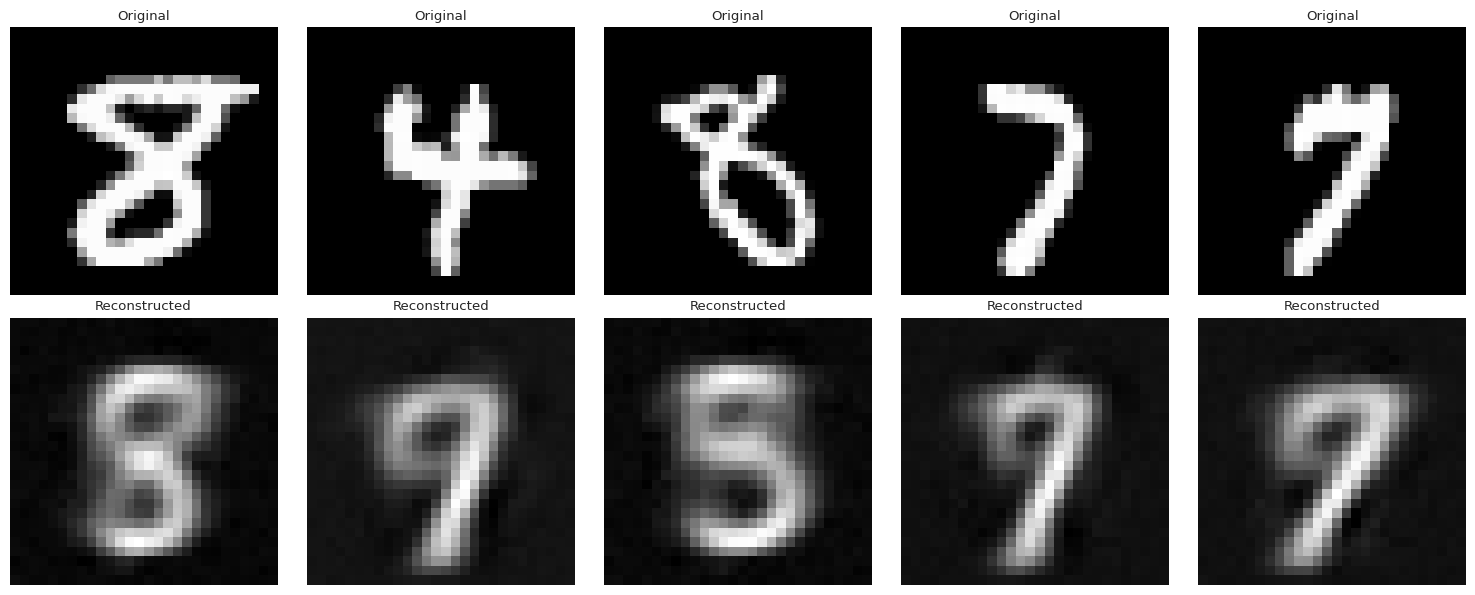

In [89]:
# your code here

# Define a function to plot the original and reconstructed images
def plot_original_and_reconstructed(model, test_loader):
    test_iter = iter(test_loader)
    x, _ = next(test_iter)  
    x = x[:5].numpy()       
    x_flat = x.reshape(x.shape[0], -1)  

    # Reconstruct the images
    model = eqx.nn.inference_mode(model, value=True)
    x_recon = vmap(model)(x_flat).reshape(-1, 28, 28) 


    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i in range(5):
        # Original images
        axes[0, i].imshow(x[i, 0], cmap="gray")
        axes[0, i].axis("off")
        axes[0, i].set_title("Original")

        # Reconstructed images
        axes[1, i].imshow(x_recon[i], cmap="gray")
        axes[1, i].axis("off")
        axes[1, i].set_title("Reconstructed")
    plt.tight_layout()
    plt.show()

# Call the function
plot_original_and_reconstructed(trained_model_cpu, test_loader)


### Part C

Plot the projections of the digits in the latent space (training and test).

**Answer:**

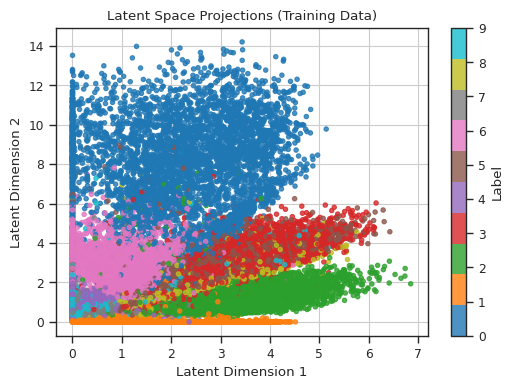

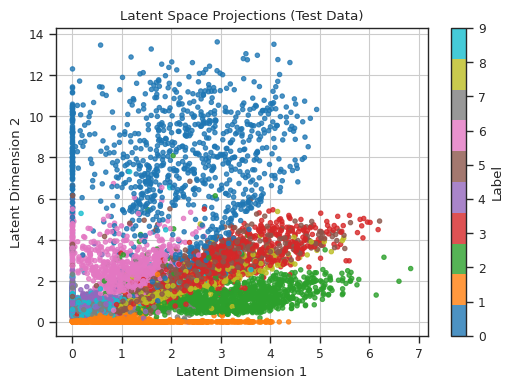

In [92]:
# your code here

def plot_latent_space_projections(model, loader, title):
    # Encode all images in the loader into the latent space
    latent_space = []
    labels = []

    for x, y in loader:
        x = x.numpy().reshape(x.shape[0], -1)
        latent_space.append(jax.vmap(model.encoder)(x))
        labels.append(y.numpy())
               
    labels = jnp.hstack(labels)
    latent_space = jnp.vstack(latent_space)

    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(latent_space[:, 0], latent_space[:, 1], c=labels, cmap="tab10", s=10, alpha=0.8)
    plt.colorbar(scatter, label="Label")
    plt.title(f"Latent Space Projections ({title})")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.grid(True)
    plt.show()

# Plot projections for training and test data
plot_latent_space_projections(trained_model_cpu, train_loader, title="Training Data")
plot_latent_space_projections(trained_model_cpu, test_loader, title="Test Data")


### Part D

Use `scikitlearn` to fit a mixture of Gaussians to the latent space. Use 10 components.
Then sample five times from the fitted mixture of Gaussians, reconstruct the samples, and plot the reconstructed images.

**Answer:**

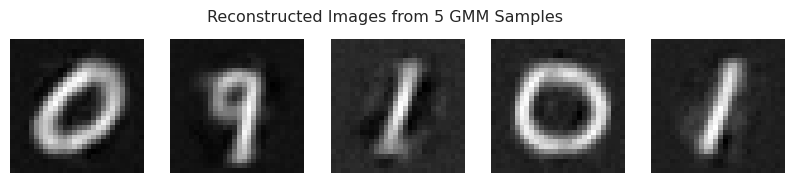

In [ ]:
# Function to fit a Gaussian Mixture Model (GMM) to the latent space and reconstruct images
def fit_gmm_and_reconstruct(loader, model, num_components=10, num_samples=5, random_state= None):

    # same code snippet from previous block 
    latent_space = []
    labels = []

    for x, y in loader:
        x = x.numpy().reshape(x.shape[0], -1)
        latent_space.append(jax.vmap(model.encoder)(x))
        labels.append(y.numpy())
               
    labels = jnp.hstack(labels)
    latent_space = jnp.vstack(latent_space)

    # Fit a Gaussian Mixture Model (GMM) with specified components
    gmm = GaussianMixture(n_components=num_components, random_state=random_state)
    gmm.fit(np.array(latent_space))

    # Sample from the GMM and reconstruct the images
    samples, _ = gmm.sample(num_samples)
    
    # Decode and plot
    reconstructed_images = jax.vmap(model.decoder)(jnp.array(samples))
    plt.figure(figsize=(10, 2))
    for i, img in enumerate(reconstructed_images):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Reconstructed Images from {num_samples} GMM Samples")
    plt.show()

# Call the function
fit_gmm_and_reconstruct(train_loader, trained_model_cpu, num_components=10, num_samples=5, random_state=SEED)
